In [109]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [110]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import os
from math import *
import torch

print("The current directory is: ")
print(os.getcwd())
if not os.getcwd().endswith("Abaqus-Hardening-Seq-2-Seq-Project"):
    # Move up two directories
    path_parent = os.path.dirname(os.getcwd())
    os.chdir(path_parent)
    path_parent = os.path.dirname(os.getcwd())
    os.chdir(path_parent)
print("The current directory is: ")
print(os.getcwd())

The current directory is: 
c:\Users\springnuance\Desktop\Abaqus-Hardening-Seq-2-Seq-Project
The current directory is: 
c:\Users\springnuance\Desktop\Abaqus-Hardening-Seq-2-Seq-Project


In [111]:
from configs.chosen_project import *
from src.stage1_global_configs import *
from src.stage2_prepare_common_data import *
from src.stage4_prepare_initial_sim_data import *

chosen_project_path = "configs/global_config_CP1000_RD_20C.json"

global_configs = main_global_configs(chosen_project_path)
stage2_outputs = main_prepare_common_data(global_configs)
stage4_outputs = main_prepare_initial_sim_data(global_configs)

all_paths = global_configs['all_paths']
objectives = global_configs['objectives']


START RUNNING FROM *** 2024-07-20 16:57:26 ***

= Stage 1: Loading configs and all paths =

Welcome to Abaqus Seq2Seq flow curve calibration project

The configurations you have chosen: 

+--------------------------+------------------------------------------------------------------+
|      Global Configs      |                           User choice                            |
+--------------------------+------------------------------------------------------------------+
|         PROJECT          |                          CP1000_RD_20C                           |
|        OBJECTIVES        |        CHD2, CHD4, NDBR2p5, NDBR6, NDBR15, NDBR40, SH115         |
|       PROJECT_PATH       | c:\Users\springnuance\Desktop\Abaqus-Hardening-Seq-2-Seq-Project |
|    TRAINING_DATA_PATH    |                   training_data/CP1000_RD_20C                    |
|         LOG_PATH         |                        log/CP1000_RD_20C                         |
|       MODELS_PATH        |               

# Loading the training data

In [112]:
project = global_configs['project']
objectives = global_configs['objectives']

all_paths = initialize_directory(project, objectives)

training_data_path = all_paths['training_data_path']
models_path = all_paths['models_path']
log_path = all_paths['log_path']

# Loading training and testing initial data

initial_train_source_diff_all = torch.load(f"{training_data_path}/initial_train_source_diff_all.pt")
initial_train_target_diff_last = torch.load(f"{training_data_path}/initial_train_target_diff_last.pt")
initial_test_source_diff_all = torch.load(f"{training_data_path}/initial_test_source_diff_all.pt")
initial_test_target_diff_last = torch.load(f"{training_data_path}/initial_test_target_diff_last.pt")

# Convert them to float32

initial_train_source_diff_all = initial_train_source_diff_all.float()
initial_train_target_diff_last = initial_train_target_diff_last.float()
initial_test_source_diff_all = initial_test_source_diff_all.float()
initial_test_target_diff_last = initial_test_target_diff_last.float()

print(f"\nShape of initial_train_source_diff_all: {initial_train_source_diff_all.shape}")
print(f"Shape of initial_train_target_diff_last: {initial_train_target_diff_last.shape}")
print(f"Shape of initial_test_source_diff_all: {initial_test_source_diff_all.shape}")
print(f"Shape of initial_test_target_diff_last: {initial_test_target_diff_last.shape}")

# Check if any of them has NaN or infinite values

print(f"\nNumber of NaN values in initial_train_source_diff_all: {torch.isnan(initial_train_source_diff_all).sum()}")
print(f"Number of NaN values in initial_train_target_diff_last: {torch.isnan(initial_train_target_diff_last).sum()}")
print(f"Number of NaN values in initial_test_source_diff_all: {torch.isnan(initial_test_source_diff_all).sum()}")
print(f"Number of NaN values in initial_test_target_diff_last: {torch.isnan(initial_test_target_diff_last).sum()}")

print(f"\nNumber of infinite values in initial_train_source_diff_all: {torch.isinf(initial_train_source_diff_all).sum()}")
print(f"Number of infinite values in initial_train_target_diff_last: {torch.isinf(initial_train_target_diff_last).sum()}")
print(f"Number of infinite values in initial_test_source_diff_all: {torch.isinf(initial_test_source_diff_all).sum()}")
print(f"Number of infinite values in initial_test_target_diff_last: {torch.isinf(initial_test_target_diff_last).sum()}")

# Ensure that all target_sequence are positive
print(f"\nNumber of values <= in initial_train_target_diff_last: {(initial_train_target_diff_last < 0).sum()}")
print(f"Number of values <= in initial_test_target_diff_last: {(initial_test_target_diff_last < 0).sum()}")

# Ensure that the scale of the source sequence is correct
print("The first time step of the initial_train_source_diff_all tensor is:")
print(initial_train_source_diff_all[0][0])

# Ensure that the scale of the target sequence is correct
print("The first time step of the initial_train_target_diff_last tensor is:")
print(initial_train_target_diff_last[0][0])


# Loading the iteration training data
iteration_train_source_diff_all = torch.load(f"{training_data_path}/iteration_train_source_diff_all.pt")
iteration_train_target_diff_last = torch.load(f"{training_data_path}/iteration_train_target_diff_last.pt")

# Convert them to float32
iteration_train_source_diff_all = iteration_train_source_diff_all.float()
iteration_train_target_diff_last = iteration_train_target_diff_last.float()

print(f"\nShape of iteration_train_source_diff_all: {iteration_train_source_diff_all.shape}")
print(f"Shape of iteration_train_target_diff_last: {iteration_train_target_diff_last.shape}")

print(f"Number of NaN values in iteration_train_source_diff_all: {torch.isnan(iteration_train_source_diff_all).sum()}")
print(f"Number of NaN values in iteration_train_target_diff_last: {torch.isnan(iteration_train_target_diff_last).sum()}")

print(f"Number of infinite values in iteration_train_source_diff_all: {torch.isinf(iteration_train_source_diff_all).sum()}")
print(f"Number of infinite values in iteration_train_target_diff_last: {torch.isinf(iteration_train_target_diff_last).sum()}")

print(f"Number of values <= 0 in iteration_train_target_diff_last: {(iteration_train_target_diff_last < 0).sum()}")

print("The first time step of the iteration_train_source_diff_all tensor is:")
print(iteration_train_source_diff_all[0][0])

print("The first time step of the iteration_train_target_diff_last tensor is:")
print(iteration_train_target_diff_last[0][0])

# Now we would like to concatenate the initial and iteration training data

combined_train_source_diff_all = torch.cat((initial_train_source_diff_all, iteration_train_source_diff_all), dim=0)
combined_train_target_diff_last = torch.cat((initial_train_target_diff_last, iteration_train_target_diff_last), dim=0)

print(f"\nShape of combined_train_source_diff_all: {combined_train_source_diff_all.shape}")
print(f"Shape of combined_train_target_diff_last: {combined_train_target_diff_last.shape}")


Shape of initial_train_source_diff_all: torch.Size([192, 99, 7])
Shape of initial_train_target_diff_last: torch.Size([192, 80, 1])
Shape of initial_test_source_diff_all: torch.Size([64, 99, 7])
Shape of initial_test_target_diff_last: torch.Size([64, 80, 1])

Number of NaN values in initial_train_source_diff_all: 0
Number of NaN values in initial_train_target_diff_last: 0
Number of NaN values in initial_test_source_diff_all: 0
Number of NaN values in initial_test_target_diff_last: 0

Number of infinite values in initial_train_source_diff_all: 0
Number of infinite values in initial_train_target_diff_last: 0
Number of infinite values in initial_test_source_diff_all: 0
Number of infinite values in initial_test_target_diff_last: 0

Number of values <= in initial_train_target_diff_last: 0
Number of values <= in initial_test_target_diff_last: 0
The first time step of the initial_train_source_diff_all tensor is:
tensor([0.0443, 0.0462, 0.0313, 0.0378, 0.0508, 0.0566, 0.0325])
The first time s

In [113]:
# Define the device

training_env = "CSC" # Choose between "local" and "CSC"
if training_env == "local":
    device = "cpu"
else:
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


# Start training the model

In [114]:

model_config = global_configs['model_config']

LSTM_hyperparams = model_config['LSTM_hyperparams']
LSTM_retraining = model_config['LSTM_retraining']
model_name = LSTM_hyperparams["model_name"]

hidden_size = LSTM_hyperparams["hidden_size"]
num_layers = LSTM_hyperparams["num_layers"]

bidirectional = LSTM_hyperparams["bidirectional"]
use_attention = LSTM_hyperparams["use_attention"]
attention_mechanism = LSTM_hyperparams["attention_mechanism"]

start_lr = 0.00001
end_lr = 0.000001
dropout = 0.01
lr_schedule = "linear"
start_tf = 1.0
end_tf = 0.0
tf_schedule = "linear"
weight_decay = 0.001
num_epochs = 1000
batch_size = 32
max_ratio_differ = 2

_, source_len, feature_size = initial_train_source_diff_all.shape
_, target_len, label_size = initial_train_target_diff_last.shape

In [116]:
from optimization.LSTM_helper import *
from optimization.LSTM import *

def retrain_model(current_iteration_index, previous_iteration_index):

    train_dataset = TensorDataset(combined_train_source_diff_all, combined_train_target_diff_last)
    test_dataset = TensorDataset(initial_test_source_diff_all, initial_test_target_diff_last)
    
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    # Initialize model, loss function, and optimizer
    model = LSTMModel(feature_size, label_size,
                    source_len, target_len,
                    hidden_size, num_layers,
                    dropout=dropout,
                    bidirectional=bidirectional, 
                    use_attention=use_attention).to(device)
    
    criterion = RMSELoss(linear_weight=True, max_ratio_differ = max_ratio_differ)  # Use the custom RMSE loss
    optimizer = optim.Adam(model.parameters(), lr=start_lr, weight_decay=weight_decay)  # Adding L2 regularization

    # Count the number of parameters
    total_params = sum(p.numel() for p in model.parameters())
    print(f'The model has {total_params} parameters')

    best_test_loss = float('inf')
    if previous_iteration_index == 0:
        # Loading the best model from the previous training
        model.load_state_dict(torch.load(f"{models_path}/LSTM/initial/{model_name}"))
    else:
        model.load_state_dict(torch.load(f"{models_path}/LSTM/iteration_{previous_iteration_index}/{model_name}"))
    
    # Create the output folder
    os.makedirs(f"{models_path}/LSTM/iteration_{current_iteration_index}", exist_ok=True)

    # Track the best model
    best_model_path = f"{models_path}/LSTM/iteration_{current_iteration_index}/{model_name}"
    
    # Lists to track train and test losses
    train_losses = []
    test_losses = []
    
    # Training loop
    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
    
        # Update learning rate
        if lr_schedule == 'linear':
            current_lr = linear_lr_scheduler(optimizer, epoch, start_lr, end_lr, num_epochs)
        else:
            current_lr = log_lr_scheduler(optimizer, epoch, start_lr, end_lr, num_epochs)
        
        # Update teacher forcing probability
        if tf_schedule == 'linear':
            teacher_forcing_prob = linear_teacher_forcing_scheduler(epoch, start_tf, end_tf, num_epochs)
        else:
            teacher_forcing_prob = log_teacher_forcing_scheduler(epoch, start_tf, end_tf, num_epochs)

        # teacher_forcing_prob = log_teacher_forcing_scheduler(epoch, start_tf, end_tf, num_epochs)
        for batch_idx, (source_batch, target_batch) in enumerate(train_loader):
            source_batch, target_batch = source_batch.to(device), target_batch.to(device)
    
            optimizer.zero_grad()
    
            # Forward pass
            outputs = model(source_batch, target_batch, teacher_forcing_prob)
            loss = criterion(outputs, target_batch)
    
            # Backward pass and optimization
            loss.backward()
            optimizer.step()
    
            train_loss += loss.item()
    
        train_loss /= len(train_loader)
        train_losses.append(train_loss)
    
        # Evaluate on test set
        model.eval()
        test_loss = 0.0

        with torch.no_grad():
            for source_batch, target_batch in test_loader:
                source_batch, target_batch = source_batch.to(device), target_batch.to(device)
    
                # Forward pass
                outputs = model(source_batch)
                loss = criterion(outputs, target_batch)
    
                test_loss += loss.item()
    
        test_loss /= len(test_loader)
        test_losses.append(test_loss)
    

        # Save the best model
        if test_loss < best_test_loss:
            print(f"New best test loss found: {test_loss}")
            best_test_loss = test_loss
            torch.save(model.state_dict(), best_model_path)
    
        # Print progress
        if (epoch+1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.9f}, Test Loss: {test_loss:.9f}, LR: {current_lr:.9f}, TF: {teacher_forcing_prob:.9f}')
    
    # Save the train and test loss lists as .npy files
    np.save(f'{models_path}/LSTM/iteration_{current_iteration_index}/train_losses.npy', np.array(train_losses))
    np.save(f'{models_path}/LSTM/iteration_{current_iteration_index}/test_losses.npy', np.array(test_losses))
    
    print('Finish retraining LSTM model')
    print(f'Best model saved with test loss: {best_test_loss:.9f}')


In [105]:
current_iteration_index = 3
previous_iteration_index = 2

# Retraining the model
retrain_model(current_iteration_index, previous_iteration_index)

The model has 8955393 parameters
New best test loss found: 0.17790772020816803
New best test loss found: 0.1672149822115898
New best test loss found: 0.16625534743070602
New best test loss found: 0.16540105640888214
Epoch [10/1000], Train Loss: 0.145360869, Test Loss: 0.174976438, LR: 0.000009919, TF: 0.991000000
Epoch [20/1000], Train Loss: 0.137962067, Test Loss: 0.173517570, LR: 0.000009829, TF: 0.981000000
Epoch [30/1000], Train Loss: 0.131144867, Test Loss: 0.170272432, LR: 0.000009739, TF: 0.971000000


KeyboardInterrupt: 

### Plot predicted flow curve

In [168]:
# Loading the pretrained model above
LSTM_model_current = LSTMModel(feature_size, label_size,
                source_len, target_len,
                hidden_size, num_layers,
                dropout=dropout,
                bidirectional=bidirectional, 
                use_attention=use_attention).to(device)

LSTM_model_previous = LSTMModel(feature_size, label_size,
                source_len, target_len,
                hidden_size, num_layers,
                dropout=dropout,
                bidirectional=bidirectional, 
                use_attention=use_attention).to(device)

LSTM_model_current.load_state_dict(torch.load(f"{models_path}/LSTM/iteration_{current_iteration_index}/{model_name}"))
LSTM_model_previous.load_state_dict(torch.load(f"{models_path}/LSTM/iteration_{previous_iteration_index}/{model_name}"))

<All keys matched successfully>

In [171]:
from modules.predict import * 

use_referenced_flow_curve = model_config["use_referenced_flow_curve"]
divided_index = model_config["divided_index"]
scale_source = model_config["scale_source"]
scale_target = model_config["scale_target"]

referenced_flow_curve_interpolated = stage2_outputs['referenced_flow_curve_interpolated']
exp_source_diff_all_unscaled = stage4_outputs['exp_source_diff_all_unscaled']

if use_referenced_flow_curve:
    referenced_true_stress = referenced_flow_curve_interpolated['stress'][:(divided_index+1)]

    # Convert to tensor float
    referenced_exp_target_original_first = torch.tensor(referenced_true_stress, dtype=torch.float32).unsqueeze(0).unsqueeze(-1)

    print(f"The referenced exp target original first shape: {referenced_exp_target_original_first.shape}")

    exp_target_original_all\
        = seq2seq_predict_with_referenced_flow_curve(referenced_exp_target_original_first=referenced_exp_target_original_first, 
                                                LSTM_model=LSTM_model_current,
                                                exp_source_diff_all=exp_source_diff_all_unscaled,
                                                scale_source=scale_source, scale_target=scale_target)
    exp_target_original_all_previous\
        = seq2seq_predict_with_referenced_flow_curve(referenced_exp_target_original_first=referenced_exp_target_original_first, 
                                                LSTM_model=LSTM_model_previous,
                                                exp_source_diff_all=exp_source_diff_all_unscaled,
                                                scale_source=scale_source, scale_target=scale_target)
    
print(f"The predicted exp target original all shape: {exp_target_original_all.shape}")

# Squeeze first and last dim and convert to np
exp_target_original_all = exp_target_original_all.squeeze(0).squeeze(-1).detach().cpu().numpy()
exp_target_original_all_previous = exp_target_original_all_previous.squeeze(0).squeeze(-1).detach().cpu().numpy()
# assert that the flow true stress is monotonically increasing
assert np.all(np.diff(exp_target_original_all) >= 0)

The referenced exp target original first shape: torch.Size([1, 20, 1])
The predicted exp target original all shape: torch.Size([1, 100, 1])


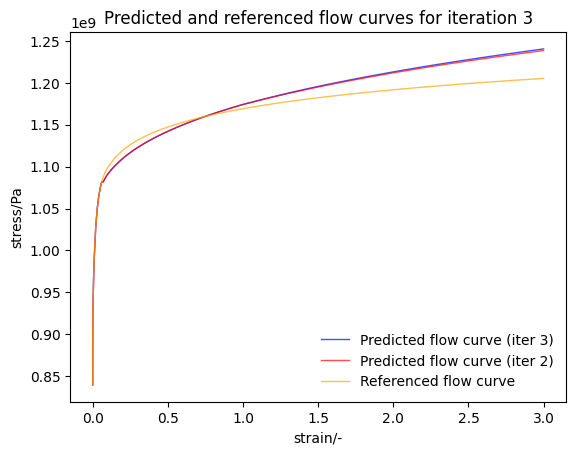

: 

In [173]:
true_plastic_strain = stage2_outputs['true_plastic_strain']
referenced_true_stress = referenced_flow_curve_interpolated['stress']

plt.plot(true_plastic_strain, exp_target_original_all, color="blue", alpha=0.7, 
         label=f"Predicted flow curve (iter {current_iteration_index})", linewidth=1)
plt.plot(true_plastic_strain, exp_target_original_all_previous, color="red", alpha=0.7,
         label=f"Predicted flow curve (iter {previous_iteration_index})", linewidth=1)
plt.plot(true_plastic_strain, referenced_true_stress, color="orange", alpha=0.7, 
         label="Referenced flow curve", linewidth=1)

plt.legend(loc=4, frameon=False)
plt.xlabel("strain/-")
plt.ylabel("stress/Pa")
plt.title(f"Predicted and referenced flow curves for iteration {current_iteration_index}")
plt.show()

### Inverse calculating Swift Voce parameters

In [130]:
from utils.hardening_laws import *
from utils.IO import pretty_print_parameters

############################################
# INVERSE CALCULATING THE NEXT PARAMETERS  #
# Output: inverse_fitted_next_params_dict  #
############################################

param_config_inverse_fitting = global_configs['param_config_inverse_fitting']
true_plastic_strain_config = global_configs['true_plastic_strain_config']
hardening_law = true_plastic_strain_config["hardening_law"]
extrapolate_N_first_strain_values =\
        true_plastic_strain_config["extrapolate_N_first_strain_values"] 
divided_index = model_config["divided_index"]

print("Start inverse calculating the next candidate parameters")
inverse_fitted_next_params_dict, lowest_RMSE =\
    calculate_inverse_hardening_law_parameters(true_plastic_strain=true_plastic_strain[divided_index+1:], 
                                                true_stress=exp_target_original_all[divided_index+1:], 
                                                hardening_law=hardening_law, param_config=param_config_inverse_fitting, RMSE_threshold=100,
                                                extrapolate_N_first_strain_values=0,
                                                max_iter=1000)

print("\n" + 60 * "#" + "\n")
print(f"Running iteration {current_iteration_index} for {project}")
print(f"The next inverse fitted parameters predicted by Seq2Seq models")
pretty_print_parameters(inverse_fitted_next_params_dict, param_config_inverse_fitting)
print(f"The fitted RMSE is {lowest_RMSE}")

Start inverse calculating the next candidate parameters

############################################################

Running iteration 3 for CP1000_RD_20C
The next inverse fitted parameters predicted by Seq2Seq models

+-----------+-----------------------+
| parameter |         value         |
+-----------+-----------------------+
|     W     |  0.41794691232581427  |
|     K     |  416622309.912665 Pa  |
|   PEEQ_0  |  0.014881106937041136 |
|     n     |  0.29520711173874925  |
|  sigma_y  |  1280062305.788299 Pa |
| sigma_sat | 436374941.10604876 Pa |
|     b     |   74.94248464749515   |
+-----------+-----------------------+

The fitted RMSE is 129401.51647986424


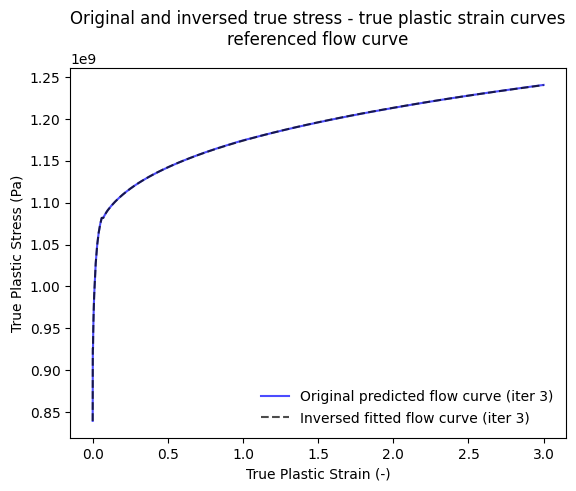

In [131]:
inversed_true_stress_original_last = calculate_true_stress(inverse_fitted_next_params_dict, hardening_law,
                                                true_plastic_strain[divided_index+1:],
                                                extrapolate_N_first_strain_values=0)

inversed_true_stress_original_all = np.concatenate((exp_target_original_all[:divided_index+1], inversed_true_stress_original_last))
plt.plot(true_plastic_strain, exp_target_original_all, color="blue", alpha=0.7, label=f"Original predicted flow curve (iter {current_iteration_index})")
plt.plot(true_plastic_strain, inversed_true_stress_original_all, color="black", alpha=0.7, label=f"Inversed fitted flow curve (iter {current_iteration_index})", linestyle="--")

plt.xlabel('True Plastic Strain (-)')
plt.ylabel('True Plastic Stress (Pa)')
plt.legend(frameon=False)
plt.title('Original and inversed true stress - true plastic strain curves\nreferenced flow curve')
plt.show()

### Sampling synthetic flow curves

In [167]:
iteration_sim_config = global_configs['iteration_sim_config']
num_synthetic_predictions = iteration_sim_config["num_synthetic_predictions"]
sampling_method = iteration_sim_config["sampling_method"]
param_config = global_configs['param_config']

current_iteration_predicted_parameters = [inverse_fitted_next_params_dict]
current_iteration_predicted_true_stress = [exp_target_original_all]       
current_iteration_predicted_flow_curves = {tuple(inverse_fitted_next_params_dict.items()) : 
                            {"strain": true_plastic_strain, "stress": exp_target_original_all}}

# Start sampling num_synthetic_predictions based on this inverse_fitted_next_params_dict
synthetic_samples = sampling_synthetic_predictions(param_config, inverse_fitted_next_params_dict, 
                                                    num_synthetic_predictions=num_synthetic_predictions * 10, method=sampling_method)

# Then choose randomly num_synthetic_predictions samples from the synthetic_samples

synthetic_samples = np.random.choice(synthetic_samples, num_synthetic_predictions, replace=False)

for params_dict in synthetic_samples:
    current_iteration_predicted_parameters.append(params_dict)
    true_stress_sample = calculate_true_stress(params_dict, hardening_law,
                                                true_plastic_strain, extrapolate_N_first_strain_values)

    current_iteration_predicted_true_stress.append(true_stress_sample)
    params_tuple = tuple(params_dict.items())
    current_iteration_predicted_flow_curves[params_tuple] = {"strain": true_plastic_strain, "stress": true_stress_sample}

current_iteration_predicted_parameters = np.array(current_iteration_predicted_parameters)
current_iteration_predicted_true_stress = np.array(current_iteration_predicted_true_stress)
        

### Plot the sampled synthetic flow curves

Text(0.5, 1.0, 'Synthetic flow curves for iteration 3')

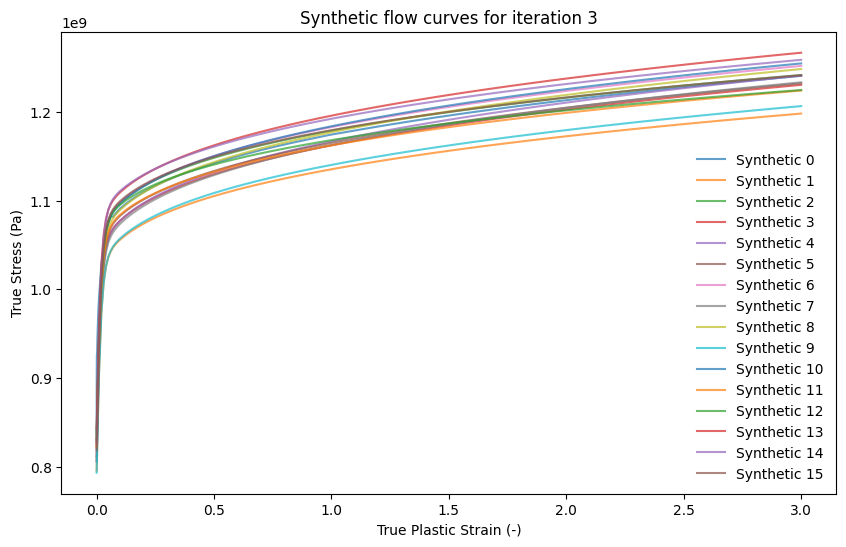

In [166]:
plt.figure(figsize=(10, 6))

for index in range(len(current_iteration_predicted_parameters)):
    params_dict = current_iteration_predicted_parameters[index]
    true_stress = current_iteration_predicted_true_stress[index]
    params_tuple = tuple(params_dict.items())
    strain = current_iteration_predicted_flow_curves[params_tuple]["strain"]
    stress = current_iteration_predicted_flow_curves[params_tuple]["stress"]
    plt.plot(strain, stress, label=f"Synthetic {index}", alpha=0.7)

plt.xlabel('True Plastic Strain (-)')
plt.ylabel('True Stress (Pa)')
plt.legend(frameon=False)
plt.title(f'Synthetic flow curves for iteration {current_iteration_index}')